In [2]:
import pandas as pd
import datetime
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# covidurl = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-27.csv'
covidurl = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-30.xlsx'

try:
    df = pd.read_excel(covidurl, parse_dates=['dateRep'], infer_datetime_format=True) 
except Exception as e:
    print('could not load covid excel')

df = df.sort_values(['countriesAndTerritories', 'dateRep'])

In [4]:
def getcovid(df, country, mindpm, startdpm, minpop):
    c = df[df.countriesAndTerritories==country].sort_values('dateRep')
    maxpop = c.popData2018.max()
    if maxpop < minpop:
        return pd.DataFrame()
    c['cumcases'] = c.cases.cumsum()
    c['cumdeaths'] = c.deaths.cumsum()
    c['CFR'] = c.cumdeaths / c.cumcases
    c['DPM'] = c.cumdeaths*1e6 / maxpop
    maxdpm = c.DPM.max()
    if maxdpm < mindpm:
        return pd.DataFrame()
    c = c[c.DPM >= startdpm]
    if len(c) <= 0:
        return pd.DataFrame()
    c = c.set_index('dateRep')
    return c[['cases', 'deaths', 'cumcases', 'cumdeaths', 'CFR', 'DPM']]


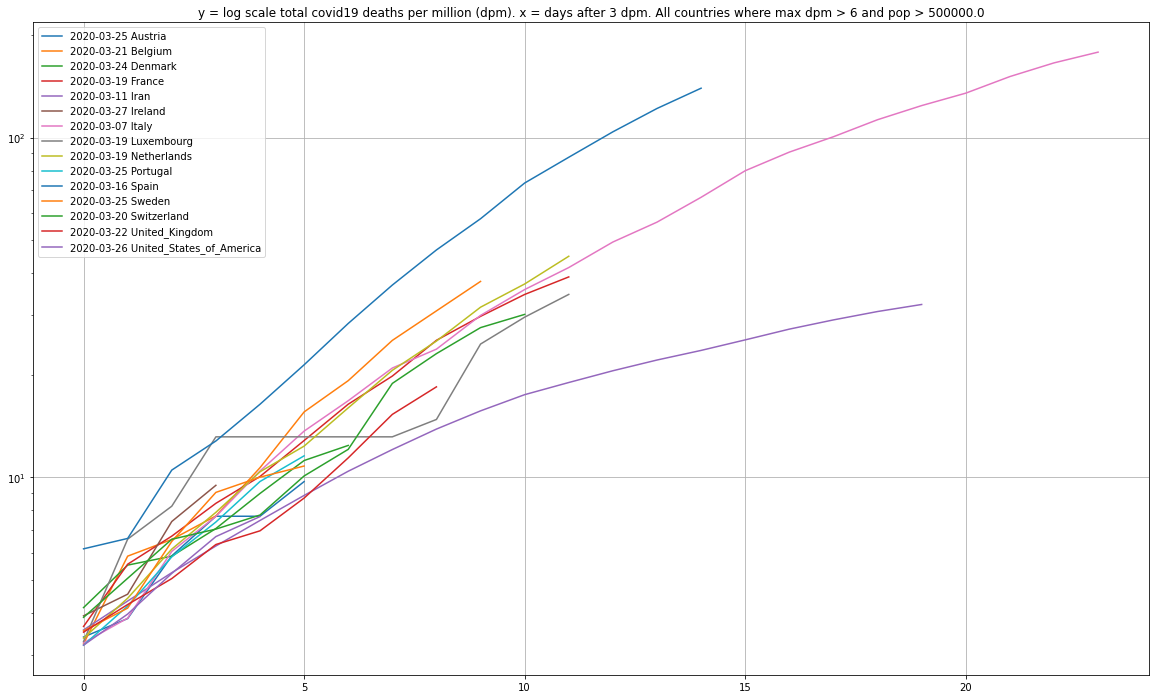

In [5]:
countries = df.countriesAndTerritories.unique()
#countries = ('Netherlands', 'Italy', 'Spain', 'Belgium', 'France', 'Luxembourg', 'Iran', 'United_States_of_America')
#countries = ('Luxembourg', 'Italy')
mindpm = 6
startdpm = 3
minpop = 5e5
pltdf = pd.DataFrame(index=list(range(50)))
for country in countries:
    c = getcovid(df, country, mindpm, startdpm, minpop)
    if c.empty:
        continue
    startdate = c.index[0].strftime('%Y-%m-%d')
    c = c.reset_index()
    pltdf[f"{startdate} {country}"] = c.DPM

p = pltdf.plot(
        figsize=(20,12), 
        legend=True, 
        logy=True, 
        grid=True,
        title=f'y = log scale total covid19 deaths per million (dpm). x = days after {startdpm} dpm. All countries where max dpm > {mindpm} and pop > {minpop}'
    )
p.get_figure().savefig('output.png')


In [7]:
singleCountry = getcovid(df, 'Luxembourg', 1, 1,1)

singleCountry

,cases,deaths,cumcases,cumdeaths,CFR,DPM
dateRep,,,,,,
2020-03-14,12,1,38,1,0.026316,1.645473
2020-03-16,39,0,77,1,0.012987,1.645473
2020-03-17,4,0,81,1,0.012346,1.645473
2020-03-18,59,0,140,1,0.007143,1.645473
2020-03-19,70,1,210,2,0.009524,3.290946
2020-03-20,135,2,345,4,0.011594,6.581892
2020-03-21,139,1,484,5,0.010331,8.227365
2020-03-22,186,3,670,8,0.011940,13.163784
2020-03-23,128,0,798,8,0.010025,13.163784
